# Homework#2: Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from TrainingNeuralNets notebook for handwriten digits recogntion, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

C:\Users\tiana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Here we can see one of the images.

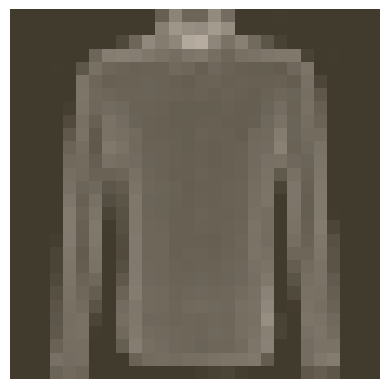

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[10,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here

import torch
import torch.nn as nn
import torch.nn.functional as F

class FashionMNISTNetwork(nn.Module):
    def __init__(self):
        super(FashionMNISTNetwork, self).__init__()
        # Input layer to hidden layer 1
        self.fc1 = nn.Linear(784, 128)  # 28x28 = 784 pixels, 128 units in the first hidden layer
        # Hidden layer 1 to hidden layer 2
        self.fc2 = nn.Linear(128, 64)   # 64 units in the second hidden layer
        # Hidden layer 2 to output layer
        self.fc3 = nn.Linear(64, 10)    # 10 units for 10 classes

    def forward(self, x):
        # Flatten image input
        x = x.view(-1, 28 * 28)
        # Activation function for hidden layer 1
        x = F.relu(self.fc1(x))
        # Activation function for hidden layer 2
        x = F.relu(self.fc2(x))
        # Output layer
        x = self.fc3(x)
        # Log-softmax function on the output layer; dim=1 as we want to apply it to each row
        x = F.log_softmax(x, dim=1)

        return x



# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# TODO: Create the network, define the criterion and optimizer


import torch.optim as optim


model = FashionMNISTNetwork()


criterion = nn.NLLLoss()


optimizer = optim.Adam(model.parameters(), lr=0.003) 


In [5]:
# TODO: Train the network here

epochs = 5  

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:  
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()  # Zero the gradients to prevent accumulation

        output = model(images)  # Forward pass: compute the model output
        loss = criterion(output, labels)  # Calculate the loss

        loss.backward()  
        optimizer.step()  

        running_loss += loss.item()
    else:
        print(f"Epoch {epoch+1}/{epochs}.. "
              f"Training loss: {running_loss/len(trainloader)}")


Epoch 1/5.. Training loss: 0.4982551347091
Epoch 2/5.. Training loss: 0.3825548116300406
Epoch 3/5.. Training loss: 0.34982567103400924
Epoch 4/5.. Training loss: 0.33146768712253966
Epoch 5/5.. Training loss: 0.3170130538390771


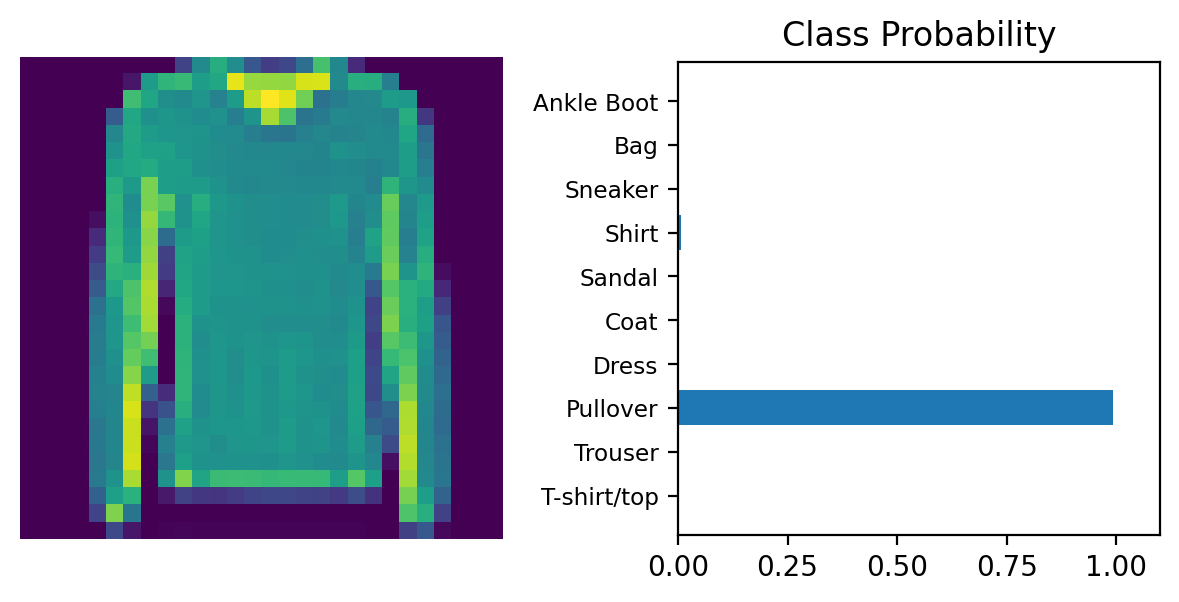

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import helper


model.eval()

dataiter = iter(testloader)
images, labels = next(dataiter) 
img = images[0]
img = img.view(1, 784)

with torch.no_grad():
    logits = model(img)

ps = torch.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')


## Extra Credit: Other Evaluation of model and results of adjusting the model

Add any other evaluation of the performance of your model or adjustment of your model in the following ...